In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [35]:
A = 180
B = 100
R = 30
d = 2
P = 70
E = 60
v = 0.28

In [40]:
D = 10 * E * d**3 / (12 * (1 - v**2))
P / D

0.16128

In [82]:
h = 2
nx = len(np.arange(0, A + h, h))
ny = len(np.arange(0, B + h, h))

In [48]:
def plot(nx, ny, h, u):
    s = np.arange(0, A + h, h)
    t = np.arange(0, B + h, h)
    tGrid, sGrid = np.meshgrid(t, s)

    surface = go.Surface(x=sGrid, y=tGrid, z=u.T)
    data = [surface]

    layout = go.Layout(
        title='Parametric Plot',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                title='t',
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                title='u(x, t)',
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            )
        )
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig, auto_open=True)

In [83]:
u = np.zeros((ny, nx))

for i in range(ny):
    for j in range(nx):
        if np.sqrt((A / 2 - h * j)**2 + (i * h)**2) <= R or \
           i == 0 or j == 0 or i == ny - 1 or j == nx - 1:
            u[i][j] = 1

plot(nx, ny, h, u)

In [72]:
def get_u(eps):
    cur_error = 1

    iters = 0
    while cur_error > eps:
        cur_error = 0
        iters += 1
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                if np.sqrt((A / 2 - h * j)**2 + (i * h)**2) <= R:
                    u[i][j] = 1
                else: 
                    prev = u[i][j]
                    u[i][j] = (u[i, j + 1] + u[i + 1, j] + u[i - 1, j] + u[i, j - 1] - h * h * P / D) / 4
                    error = abs(prev - u[i][j])
                    cur_error = max(error, cur_error)
        print(cur_error)

    return iters, u

In [84]:
%%time
iters, u = get_u(0.001)
plot(nx, ny, h, u) 

0.36829333333333336
0.32255999999999996
0.32255999999999985
0.32256000000000007
0.32255999999999974
0.3225599999999935
0.3225599999999327
0.3225599999993847
0.3225599999951667
0.32255999996675744
0.32255999979727035
0.32255999889275255
0.3225599945394353
0.3225599755157953
0.32255989959860276
0.3225598033627941
0.3225594926755111
0.32255912224010785
0.32255844107483433
0.32255707614469564
0.3225551917070293
0.3225529855343421
0.32254948478950674
0.32254402189861864
0.322536968021069
0.3225275110304544
0.3225172884858569
0.3225042505651903
0.3224872962222811
0.32246555438942437
0.3224383252947991
0.322408904940934
0.3223732705266009
0.32233057038382107
0.3222830727293129
0.32223238211780547
0.3221738521829032
0.32210673981158955
0.32203031674615445
0.3219438770475751
0.3218467434195347
0.3217464221435904
0.32163724022629836
0.3215170902964424
0.3213854678713801
0.3212419031704812
0.3210859626877163
0.32091725020272577
0.32073540729846783
0.32054632666407734
0.32035278307703763
0.3201464

0.10181697259400835
0.10145586588089373
0.10109597716009944
0.1007373029829921
0.1003798399028284
0.10002358447495396
0.09966853325677505
0.09931468280801425
0.09896202969073897
0.0986105704695035
0.09826030171140587
0.09791121998631525
0.09756332186687189
0.09721660392851561
0.0968710627499263
0.09652669491259758
0.0961834970014337
0.09584146560453632
0.0955005973134746
0.0951608887231572
0.09482233643223026
0.09448493704292105
0.09414868716112323
0.09381358339675216
0.09347962236347485
0.09314680067905101
0.09281511496527628
0.09248456184815268
0.09215513795786023
0.09182683992892748
0.09149966440033097
0.09117360801540997
0.0908493907138137
0.09052700820528514
0.09020571924666854
0.08988552062375277
0.08956640912631997
0.0892483815483871
0.08893143468804965
0.08861556534779425
0.08830077033431394
0.08798704645872135
0.08767439053664816
0.08736279938807456
0.08705226983769876
0.08674279871479484
0.08643438285321281
0.08612701909174802
0.08582070427372912
0.08551543524754379
0.0852112

0.023719020391666845
0.02363369255760972
0.023548668609223
0.02346394748698799
0.023379528135038186
0.023295409500889264
0.023211590535623827
0.02312807019383456
0.02304484743352475
0.02296192121619356
0.022879290506864436
0.022796954273886172
0.022714911489174483
0.022633161127956214
0.022551702168996712
0.022470533594358244
0.022389654389570524
0.022309063543531238
0.022228760048506047
0.022148742900185425
0.022069011097499924
0.02198956364281912
0.021910399541866354
0.02183151780361925
0.021752917440423403
0.02167459746792133
0.021596556905052466
0.02151879477402474
0.021441310100357214
0.02136410191282323
0.02128716924343621
0.02121051112747807
0.021134126603513437
0.021058014713190687
0.020982174501568807
0.020906605016762114
0.020831305310196058
0.02075627443635142
0.02068151145304853
0.020607015421177266
0.02053278540482495
0.020458820471148442
0.02038511969061574
0.0203116821366649
0.02023850688594564
0.020165593018106165
0.020092939616148442
0.020020545765817133
0.019948410556

0.00567522966167644
0.0056546588052128754
0.005634162329556602
0.005613739966946696
0.00559339145060278
0.005573116514781873
0.00555291489456522
0.005532786326128303
0.005512730546456623
0.005492747293473599
0.0054728363061542495
0.005452997324312037
0.005433230088712548
0.005413534341030868
0.005393909823894205
0.0053743562808250545
0.005354873456298037
0.005335461095612004
0.005316118945088988
0.005296846751889461
0.00527764426405497
0.005258511230579188
0.005239447401351072
0.005220452527140651
0.0052015263595563965
0.005182668651158906
0.005163879155404061
0.005145157626543551
0.005126503819795403
0.005107917491216085
0.005089398397714717
0.005070946297124124
0.005052560948058726
0.005034242110070863
0.005015989543537103
0.004997803009700874
0.004979682270644048
0.004961627089343779
0.004943637229573028
0.004925712455900566
0.004907852533932555
0.0048900572298720135
0.004872326310916719
0.004854659545060258
0.004837056701063602
0.0048195175486114294
0.004802041858170014
0.004784629

0.0014152559085260918
0.0014101156199046727
0.0014049939853464366
0.001399890937307191
0.0013948064084132739
0.001389740331561029
0.0013846926398599635
0.0013796632666895903
0.0013746521456852179
0.0013696592106384742
0.0013646843956962584
0.0013597276351760001
0.0013547888636082916
0.001349868015836364
0.0013449650268881896
0.0013400798320333251
0.0013352123667971227
0.001330362566861254
0.0013255303682626618
0.0013207157071803977
0.0013159185200493084
0.0013111387435600363
0.0013063763145453322
0.0013016311701932182
0.0012969032477911924
0.0012921924849962352
0.0012874988195363812
0.001282822189452304
0.001278162533054683
0.0012735197887252525
0.001268893895257861
0.0012642847914605682
0.00125969241658197
0.0012551167098990845
0.0012505576110584116
0.0012460150597775055
0.0012414889961576137
0.0012369793603852486
0.0012324860929027182
0.0012280091343939148
0.0012235484257132612
0.0012191039079851862
0.0012146755224904382
0.0012102632107655609
0.001205866914531839
0.001201486575709509

In [86]:
epsilons = np.linspace(0.5, 0.001, 50)
iters = []
errors = []

for i, eps in enumerate(epsilons):
    it, u1 = get_u(eps)
    if i == 0:
        iters.append(it)
    else:
        iters.append(it + iters[i - 1])
    
    print(it)

0.0009907148334775684
1
0.0009871155309184587
1
0.0009835292959365916
1
0.0009799560811387664
1
0.0009763958392881023
1
0.0009728485233182482
1
0.0009693140863618055
1
0.0009657924817503272
1
0.0009622836628579989
1
0.0009587875834142778
1
0.0009553041971344101
1
0.0009518334580320698
1
0.0009483753201919853
1
0.0009449297379688915
1
0.0009414966657601553
1
0.0009380760582473613
1
0.0009346678701831479
1
0.0009312720565333166
1
0.0009278885723915664
1
0.0009245173731358136
1
0.0009211584140729201
1
0.0009178116509076517
1
0.0009144770393305635
1
0.0009111545353448491
1
0.0009078440949679134
1
0.0009045456744445346
1
0.0009012592302042322
1
0.0008979847188186341
1
0.0008947220969730552
1
0.0008914713215801839
1
0.0008882323495811306
1
0.0008850051382864876
1
0.0008817896449215823
1
0.0008785858270528024
1
0.0008753936423033792
1
0.0008722130484670743
1
0.0008690440035081792
1
0.0008658864655330945
1
0.0008627403928187505
1
0.0008596057437415539
1
0.0008564824768768631
1
0.00085337055094

In [78]:
iters

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 65,
 86,
 102,
 116,
 130,
 143,
 155,
 168,
 181,
 195,
 208,
 223,
 237,
 253,
 269,
 286,
 305,
 324,
 345,
 367,
 391,
 418,
 447,
 480,
 517,
 559,
 609,
 670,
 748,
 856,
 1035,
 1700]

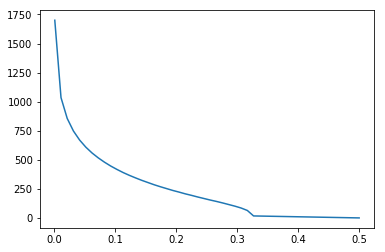

In [79]:
plt.plot(epsilons, iters)

0.725759999999988
0.7257599999994505
0.7257599999876057
0.7257599998171713
0.7257599980163549
0.7257599831180168
0.7257598826256144
0.7257593143741321
0.7257565653810696
0.7257450111613721
0.7257260106881986
0.7256780508700222
0.725624878642348
0.7255321102664514
0.7253724610018235
0.7251676382691468
0.7249043959121231
0.7245987389845752
0.7241904030587563
0.723659713520604
0.7230314709089232
0.722330022894635
0.7214912317644906
0.7205050231112224
0.7193709490777636
0.7182374127378779
0.716960593251688
0.7155363074655057
0.7139619156176629
0.7122362003284763
0.7105130847884809
0.7086714599115247
0.7066965520049457
0.7045898664762191
0.702353614486924
0.6999906146863282
0.6975042002228058
0.6948981321451626
0.692176519812822
0.6893437485744087
0.6865413176943136
0.6836777801535447
0.6807229168903675
0.6776807399294746
0.6745553237921129
0.6713507751582029
0.6680712062653384
0.6647207117728442
0.6613033488131634
0.6578231199539033
0.6542839588006046
0.6506897179804696
0.6470620111919345


0.041053155347000825
0.04073445348637961
0.04041820416802011
0.04010438887716816
0.03979298923277952
0.03948398698653932
0.039177364022236816
0.03887310235465691
0.03857118412891225
0.03827159161956217
0.037974307229674764
0.03767931349010212
0.03738659305864189
0.037096128719070975
0.03680790338053441
0.03652190007659328
0.036238101964300995
0.03595649232363485
0.03567705455658654
0.03539977218619583
0.03512462885593948
0.034851608328978045
0.03458069448706169
0.034311871330075405
0.03404512297507267
0.03378043365549388
0.03351778772045577
0.03325716963394143
0.03299856397400447
0.03274195543201586
0.03248732881189653
0.0322346690294637
0.03198396111143609
0.03173530186883511
0.03148858435848467
36
0.031243772521534652
0.0310008518373337
0.03075980789259347
0.030520626380535987
0.030283293100339392
0.03004779395632795
0.02981411495720465
0.029582242215383303
0.02935216194632062
0.029123860467677787
0.02889732419865254
0.028672539659396534
0.02844949347016268
0.028228172350623026
0.028

0.0019050085220300161
0.001890114265449938
0.0018753363694372638
0.0018606739260178529
0.0018461260341950947
0.0018316918001062277
0.0018173703367949656
0.0018031607641546543
0.0017890622090419583
0.0017750738050779091
0.0017611946925910615
0.0017474240186317047
0.0017337609369434404
0.0017202046078068634
0.0017067541980395617
0.001693408880981906
0.0016801678364259942
0.0016670302504877554
0.0016539953157064247
0.0016410622309024347
0.001628230201006886
0.0016154984373599746
0.0016028661572988767
0.0015903325842856475
0.0015778969478787985
0.0015655584836054004
0.0015533164329184501
0.0015411700432537145
0.0015291185678876218
0.0015171612658804179
0.0015052974020903775
0.0014935262471169608
0.0014818470772581804
0.0014702591743969151
0.001458761826043542
0.001447354325307515
0.0014360359707126236
0.0014248060663106799
0.0014136639216388858
0.001402608851449827
0.001391640175981479
0.0013807572207582552
0.0013699593165057422
0.0013592457991649098
0.001348616009877901
0.0013380692949738

0.018898010937846266
0.018627529188719905
0.018360907727455356
0.01809809171646748
0.017839027090644777
0.017583660547160207
0.01733193953441514
0.017083812241850183
0.016839227589528605
0.016598135218089283
0.016360485478642772
0.01612622942292319
0.015895318793468505
0.015667706014141913
0.015443344180496865
0.01522218705046896
0.015004189035195736
0.014789305189822244
0.014577491204590842
0.01436870339587415
0.014162898697634319
0.013960034652512832
0.013760069403616626
0.013562961685920527
0.013368670818096007
0.013177156694339942
0.012988379776246006
0.012802301085031331
0.012618882193493164
0.012438085218462902
0.012259872813146444
0.012084208159464538
0.011911054960947354
0.011740377435060623
0.011572140306299161
0.011406308798910914
0.011242848629933633
0.01108172600235946
45
0.010922907598128972
0.010766360571537348
0.010612052542654737
0.010459951590632954
0.010310026247367432
0.01016224549110234
0.010016578740120963
0.009872995846620825
0.009731467090574597
0.009591963173775

0.0025278264436110476
0.00243039594343486
0.0023367177600448485
0.0022466475410283238
0.002160046478508093
0.002076781096917557
0.0019967230482507148
0.0019197489158102599
0.0018457400248905742
0.0017745822612482698
0.00170616589588235
0.0016403854170050636
0.0015771393684644863
0.0015163301937377582
0.0014578640866318437
0.0014016508474128386
0.001347603744108028
0.0012956393797480814
0.001245677564241987
0.0011976411910552542
0.0011514561193735062
0.0011070510595345695
0.0010643574642017484
0.0010233094226066441
0.0009838435595383999
61
6.531477608492297
6.5263320929546005
6.491785699179415
6.437418840342119
6.284510637660659
6.1177468024659305
5.907933029407843
5.679021521448938
5.441150881085953
5.183713525062238
4.915707015008358
4.664681729985347
4.423875507549511
4.186350632126519
3.954670799140942
3.730647263132397
3.522501132726134
3.3277625423954333
3.1409957665676274
2.962477390303704
2.7923206085627896
2.6305112632033456
2.478645626467852
2.3373122548780856
2.20310001841998

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

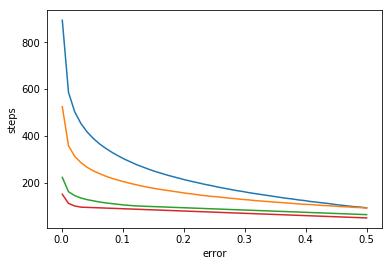

In [89]:
u1 = np.copy(u)

for h in [3, 4, 7, 9]:
    nx = len(np.arange(0, A + h, h))
    ny = len(np.arange(0, B + h, h))
    u = np.zeros((ny, nx))

    for i in range(ny):
        for j in range(nx):
            if np.sqrt((A / 2 - h * j)**2 + (i * h)**2) <= R or \
               i == 0 or j == 0 or i == ny - 1 or j == nx - 1:
                u[i][j] = 1
                
    iters = []
    for i, eps in enumerate(epsilons):
        it, u = get_u(eps)
        if i == 0:
            iters.append(it)
        else:
            iters.append(it + iters[i - 1])
        print(it)
    
    #dx, dy = int(u.shape[1] / u1.shape[1]), int(u.shape[0] / u1.shape[0])
    #errors += np.mean(np.abs(u[::dx, ::dy] - u1))
    plot(nx, ny, h, u)
    
    plt.plot(epsilons, iters, label='h = {}'.format(h))

plt.xlabel('error')
plt.ylabel('steps')
plt.label()
plt.show()

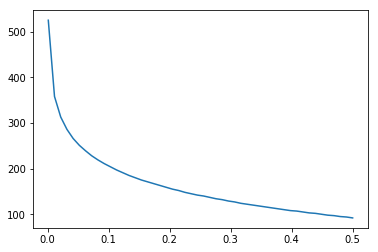

In [81]:
plt.plot(epsilons, iters, label='h = {}'.format(h))